#### Data Cleaning and Preparation

During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: 
 1. loading
 2. cleaning 
 3. transforming 
 4. rearranging 
 
Such tasks are often reported to take up 80% or more of an analyst’s time.

#### Handling Missing Data


In [17]:
import pandas as pd
import numpy as np
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [5]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [7]:
string_data[string_data.notnull()]

0     aardvark
1    artichoke
3      avocado
dtype: object

NA handling methods
Argument    Description
 dropna  Filter axis labels based on whether values for each label have missing data, with varying thresholds for how much 
         missing data to tolerate.
 fillna  Fill in missing data with some value or using an interpolation method such as 'ffill' or 'bfill'.
isnull   Return boolean values indicating which values are            missing/NA.notnullNegation of isnull.


##### DataFrame.dropna

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

axis : {0 or ‘index’, 1 or ‘columns’}, default 0

how : {‘any’, ‘all’}, default ‘any’
    * ‘any’ : If any NA values are present, drop that row or column.
    * ‘all’ : If all values are NA, drop that row or column.

In [24]:
data = pd.DataFrame({
    "name": ['Alfred', 'Batman', 'Catwoman'],
    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
    "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT]
    
})
data['play'] = "NA"
data

,born,name,toy,play
0,NaT,Alfred,NaN,NA
1,1940-04-25,Batman,Batmobile,NA
2,NaT,Catwoman,Bullwhip,NA


In [25]:
data.dropna()

,born,name,toy,play
1,1940-04-25,Batman,Batmobile,NA


In [26]:
data.dropna(how='all')

,born,name,toy,play
0,NaT,Alfred,NaN,NA
1,1940-04-25,Batman,Batmobile,NA
2,NaT,Catwoman,Bullwhip,NA


In [30]:
data.dropna(axis=1)

,name,play
0,Alfred,NA
1,Batman,NA
2,Catwoman,NA


In [27]:
data.dropna(thresh=2)
# when at least two data is NaN

,born,name,toy,play
0,NaT,Alfred,NaN,NA
1,1940-04-25,Batman,Batmobile,NA
2,NaT,Catwoman,Bullwhip,NA


In [15]:
# Define in which columns to look for missing values.
data.dropna(subset=['name', 'born'])

,born,name,toy
1,1940-04-25,Batman,Batmobile


In [19]:
data

,born,name,toy
1,1940-04-25,Batman,Batmobile


In [18]:
data.dropna(inplace=True)
data
# we should not do that as it is change the data. instead of changing the data we could have save it into a new variable 

,born,name,toy
1,1940-04-25,Batman,Batmobile


##### DataFrame.fillna

DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)

Fill NA/NaN values using the specified method

In [31]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1],[np.nan, np.nan, np.nan, 5],[np.nan, 3, np.nan, 4]],columns=list('ABCD'))

In [32]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [33]:
df.fillna(0)
#filled NaN with 0

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [34]:
df.fillna(method='ffill')
# ffill took  previous data and place it to next 

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [35]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [42]:
#Replace all NaN elements in column ‘A’, ‘B’, ‘C’, and ‘D’, with 0, 1, 2, and 3 respectively.
values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df.fillna(value=values,limit=2 )

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,NaN,5
3,NaN,3.0,NaN,4


In [48]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

##### Data Transformation

Filtering, cleaning, and other transformations

In [49]:
#Removing Duplicates
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})

In [50]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [51]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [52]:
#drop_duplicates returns a DataFrame where the duplicated array is False
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [68]:
#Transforming Data Using a Function or Mapping
value = {'food': ['bacon', 'pulled pork', 'bacon','Pastrami', 'corned beef', 'Bacon','pastrami', 'honey ham', 'nova lox'],
        'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]}
data =pd.DataFrame(value)
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

map(lambda x : x['meat_to_animal'], data)


In [77]:
class FilterDict(dict):
    def __init__(self, input_dict):
        for key, value in input_dict.items():
            self[key] = value
    def filter(self, criteria):
        for key, value in list(self.items()):
            if (criteria(value)):
                self.pop(key)

my_dict = FilterDict( {'a':(3,4), 'b':(1,2), 'c':(5,5), 'd':(3,3)} )
my_dict.filter(lambda x: x[0] < 5 and x[1] < 5)
my_dict

{'c': (5, 5)}

In [78]:
data = pd.DataFrame(my_dict)
data

,c
0,5
1,5


In [2]:
square = lambda x: x * x
print(square(5))

25


In [9]:
is_even = lambda y: y%2 == 0
evens = lambda x: filter(is_even, x)
print(list(evens(range(100))))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


In [8]:
convert_to_int = lambda iterable: map(int, iterable)
print(list(convert_to_int(['123','12','12'])))

[123, 12, 12]


In [15]:
data = ['sam','1','dad','21']
try_case = lambda z: map(lambda x:int(x) if x.isdigit() else x,data)
print(list(try_case(data)))

['sam', 1, 'dad', 21]


In [25]:
# Replacing Values
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data.replace(-999, np.nan, inplace=True)
data

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [23]:
data.replace([-999,-1000], np.nan, inplace=True)
data

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [26]:
data.replace([-999,-1000], [np.nan,0], inplace=True)
data

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

##### Renaming Axis Indexes

In [31]:
#data.replace method and  data.str.replace are differnt where data.str.replace generally used in string substitution
data = pd.DataFrame(np.arange(12).reshape((3,4)))
print(data)
print('"""""""""""""""""""""""')
data = pd.DataFrame(np.arange(12).reshape((3,4)), index=['Ohio', 'Colorado', 'New York'],
                   columns=['one', 'two', 'three', 'four'])
data

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
"""""""""""""""""""""""


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [35]:
# rename can be used in conjunction with a dict-like object providing new values for a subset of the axis labels:
data.rename(index = {'Ohio': 'Here'}, columns = {'two':'double'})

,one,double,three,four
Here,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


#### Combining and Merging Datasets

Data contained in pandas objects can be combined together in a number of ways:
    * pandas.merge
    * pandas.concat
    * combine_first

In [40]:
#Database-Style DataFrame Joins
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
print(df1)
print("++++++++++++++++++++++")
print(df2)

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b
++++++++++++++++++++++
   data2 key
0      0   a
1      1   b
2      2   d


In [41]:
m_o_relation = pd.merge(df1,df2)
#merging by swaping the data possition
s_m_o_relation = pd.merge(df2,df1)
print(m_o_relation)
print("+++++++++++++")
print(s_m_o_relation)

   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
+++++++++++++
   data2 key  data1
0      0   a      2
1      0   a      4
2      0   a      5
3      1   b      0
4      1   b      1
5      1   b      6


In [47]:
m_o_relation = pd.merge(df1,df2, on='key', how='left')
m_o_relation
#left join
m_o_relation = pd.merge(df1,df2, on='key', how='right')
m_o_relation
#right join
m_o_relation = pd.merge(df1,df2, on='key', how='outer')
m_o_relation
#inner and outer join deppends on key value
m_o_relation = pd.merge(df1,df2, on='key', how='inner')
m_o_relation

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


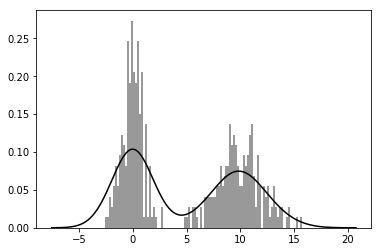

In [49]:
import seaborn as sns
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10,2, size =200)
values =pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [50]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [53]:
left1.join(right1, on='key',how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [54]:
#Concatenating Along an Axis
arr = np.arange(12).reshape((3, 4))

In [55]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [56]:
np.concatenate([arr, arr])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [57]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [58]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
pd.concat([s1, s2, s3], axis=1)


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [65]:
s4=pd.concat([s1, s2, s3])
print(s4)

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64


In [63]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


##### Data Aggregation and Group Operations